In [1]:
import pandas as pd
import seaborn as sns
import datetime
import time
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
import numpy as np
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
df = pd.read_csv(r'/Users/xuzhejia/Desktop/商務數據/cmc_2.csv')

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
group = df.groupby(['year','month','type2'])
group_year = []
group_month = []
group_sum = []
group_oil = []
group_steel = []
group_CPI = []
group_CPIT = []
group_economicgrowth = []
group_gdp = []
group_incomeaverage = []
group_covid = []
group_industry = []
group_stock = []
group_type = []
group_signal = []
group_lead = []
for x,y in group:
    group_year.append(list(group.get_group(x)['year'])[0])
    group_month.append(list(group.get_group(x)['month'])[0])
    group_sum.append(group.get_group(x)['number'].sum())
    group_oil.append(list(group.get_group(x)['oil'])[0])
    group_steel.append(list(group.get_group(x)['steel'])[0])
    group_CPI.append(list(group.get_group(x)['CPI'])[0])
    group_CPIT.append(list(group.get_group(x)['CPIT'])[0])
    group_economicgrowth.append(list(group.get_group(x)['economicgrowth'])[0])
    group_gdp.append(list(group.get_group(x)['gdp'])[0])
    group_incomeaverage.append(list(group.get_group(x)['income average'])[0])
    group_covid.append(list(group.get_group(x)['covid'])[0])
    group_industry.append(list(group.get_group(x)['industry'])[0])
    group_stock.append(list(group.get_group(x)['stock'])[0])
    group_type.append(list(group.get_group(x)['type2'])[0])
    group_signal.append(list(group.get_group(x)['signal'])[0])
    group_lead.append(list(group.get_group(x)['lead'])[0])

In [4]:
df_groupby = pd.DataFrame([group_year,group_month,group_sum,group_oil,group_steel,group_CPI,group_CPIT,group_economicgrowth,group_gdp,group_incomeaverage,
group_covid,group_industry,group_stock,group_signal,group_lead,group_type]).T
df_groupby.columns = ['year','month','sum','oil','steel','CPI','CPIT','economicgrowth','gdp','incomeaverage','covid','industry','stock','signal','lead','type']

In [5]:
df_groupby['year'] = df_groupby['year'].astype(str)
df_groupby['month'] = df_groupby['month'].astype(str)
df_groupby['year'] = df_groupby['year'].apply(lambda x:x.replace('.0',""))
df_groupby['month'] = df_groupby['month'].apply(lambda x:x.replace('.0',""))

In [6]:
df_groupby['date'] = df_groupby['year'] +'/' + df_groupby['month']
df_groupby

,year,month,sum,oil,steel,CPI,CPIT,economicgrowth,gdp,incomeaverage,covid,industry,stock,signal,lead,type,date
0,2012,1,13475,110.63,24000,96.37,106.78,1.09,3573234.0,133393.0,0.0,78.08,7517.08,13.0,89.4,RV車,2012/1
1,2012,1,3050,110.63,24000,96.37,106.78,1.09,3573234.0,133393.0,0.0,78.08,7517.08,13.0,89.4,商車,2012/1
2,2012,1,23609,110.63,24000,96.37,106.78,1.09,3573234.0,133393.0,0.0,78.08,7517.08,13.0,89.4,轎車,2012/1
3,2012,2,7692,122.68,24000,95.09,106.86,1.09,3573234.0,133393.0,0.0,84.12,8121.44,15.0,90.18,RV車,2012/2
4,2012,2,2155,122.68,24000,95.09,106.86,1.09,3573234.0,133393.0,0.0,84.12,8121.44,15.0,90.18,商車,2012/2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,2022,2,3025,103.07,"29,979",106.02,107.96,3.06,NaN,NaN,NaN,NaN,17652.18,NaN,NaN,商車,2022/2
365,2022,2,7073,103.07,"29,979",106.02,107.96,3.06,NaN,NaN,NaN,NaN,17652.18,NaN,NaN,轎車,2022/2
366,2022,3,21228,114.87,"29,979",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17693.47,NaN,NaN,RV車,2022/3
367,2022,3,4778,114.87,"29,979",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17693.47,NaN,NaN,商車,2022/3


In [7]:
df_groupby.set_index(pd.to_datetime(df_groupby['date'],format = '%Y/%m'),inplace = True)
df_groupby

,year,month,sum,oil,steel,CPI,CPIT,economicgrowth,gdp,incomeaverage,covid,industry,stock,signal,lead,type,date
date,,,,,,,,,,,,,,,,,
2012-01-01,2012,1,13475,110.63,24000,96.37,106.78,1.09,3573234.0,133393.0,0.0,78.08,7517.08,13.0,89.4,RV車,2012/1
2012-01-01,2012,1,3050,110.63,24000,96.37,106.78,1.09,3573234.0,133393.0,0.0,78.08,7517.08,13.0,89.4,商車,2012/1
2012-01-01,2012,1,23609,110.63,24000,96.37,106.78,1.09,3573234.0,133393.0,0.0,78.08,7517.08,13.0,89.4,轎車,2012/1
2012-02-01,2012,2,7692,122.68,24000,95.09,106.86,1.09,3573234.0,133393.0,0.0,84.12,8121.44,15.0,90.18,RV車,2012/2
2012-02-01,2012,2,2155,122.68,24000,95.09,106.86,1.09,3573234.0,133393.0,0.0,84.12,8121.44,15.0,90.18,商車,2012/2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,2022,2,3025,103.07,"29,979",106.02,107.96,3.06,NaN,NaN,NaN,NaN,17652.18,NaN,NaN,商車,2022/2
2022-02-01,2022,2,7073,103.07,"29,979",106.02,107.96,3.06,NaN,NaN,NaN,NaN,17652.18,NaN,NaN,轎車,2022/2
2022-03-01,2022,3,21228,114.87,"29,979",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17693.47,NaN,NaN,RV車,2022/3


In [8]:
df_groupby['steel'] = df_groupby['steel'].astype(str).apply(lambda x:x.replace(",",'')).astype(float)

In [9]:
#標準化
sc = StandardScaler()
df_groupby['oil_sc'] = sc.fit_transform(df_groupby['oil'].values.reshape(-1,1))
df_groupby['steel_sc'] = sc.fit_transform(df_groupby['steel'].values.reshape(-1,1))
df_groupby['CPI_sc'] = sc.fit_transform(df_groupby['CPI'].values.reshape(-1,1))
df_groupby['CPIT_sc'] = sc.fit_transform(df_groupby['CPIT'].values.reshape(-1,1))
df_groupby['economicgrowth_sc'] = sc.fit_transform(df_groupby['CPIT'].values.reshape(-1,1))
df_groupby['gdp_sc'] = sc.fit_transform(df_groupby['gdp'].values.reshape(-1,1))
df_groupby['incomeaverage_sc'] = sc.fit_transform(df_groupby['incomeaverage'].values.reshape(-1,1))
df_groupby['covid_sc'] = sc.fit_transform(df_groupby['covid'].values.reshape(-1,1))
df_groupby['industry_sc'] = sc.fit_transform(df_groupby['industry'].values.reshape(-1,1))
df_groupby['stock_sc'] = sc.fit_transform(df_groupby['stock'].values.reshape(-1,1))
df_groupby['signal_sc'] = sc.fit_transform(df_groupby['signal'].values.reshape(-1,1))
df_groupby['lead_sc'] = sc.fit_transform(df_groupby['lead'].values.reshape(-1,1))

In [10]:
df_groupby = df_groupby.loc['2012-01-01':'2020-12-01',:]

In [11]:
df_groupby_商車 = df_groupby[df_groupby['type'] == '商車']

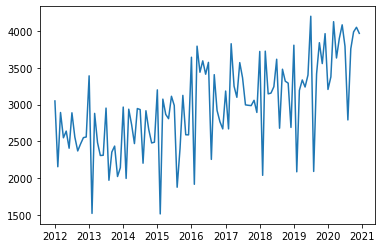

In [12]:
plt.plot(df_groupby_商車.index,df_groupby_商車['sum'])

In [13]:
adfuller(df_groupby_商車['sum'].diff()[1:]) #一街差分定太

(-6.850750384831774,
 1.696773012381638e-09,
 10,
 96,
 {'1%': -3.5003788874873405,
  '5%': -2.8921519665075235,
  '10%': -2.5830997960069446},
 1375.1074885755693)

In [14]:
df_model_商車 = df_groupby_商車.loc[:,['sum','oil_sc','steel_sc','CPI_sc','CPIT_sc','economicgrowth_sc','gdp_sc',
'incomeaverage_sc','covid_sc','industry_sc','stock_sc','signal_sc','lead_sc']]

In [15]:
df_model_商車['oil_sc_last_month'] = df_model_商車['oil_sc'].shift()
df_model_商車['steel_sc_last_month'] = df_model_商車['steel_sc'].shift()
df_model_商車['CPI_sc_last_month'] = df_model_商車['CPI_sc'].shift()
df_model_商車['economicgrowth_sc_last_month'] = df_model_商車['economicgrowth_sc'].shift()
df_model_商車['gdp_sc_last_month'] = df_model_商車['gdp_sc'].shift()
df_model_商車['incomeaverage_sc_last_month'] = df_model_商車['incomeaverage_sc'].shift()
df_model_商車['covid_sc_last_month'] = df_model_商車['covid_sc'].shift()
df_model_商車['industry_sc_last_month'] = df_model_商車['industry_sc'].shift()
df_model_商車['stock_sc_last_month'] = df_model_商車['stock_sc'].shift()
df_model_商車['CPIT_sc_last_month'] = df_model_商車['CPIT_sc'].shift()
df_model_商車['last_sell'] = df_model_商車['sum'].shift()
df_model_商車['signal_sc_last_month'] = df_model_商車['signal_sc'].shift()
df_model_商車['lead_sc_last_month'] = df_model_商車['lead_sc'].shift()

In [16]:
#將第一列的空值排除
df_model_商車 = df_model_商車.iloc[1:,:]

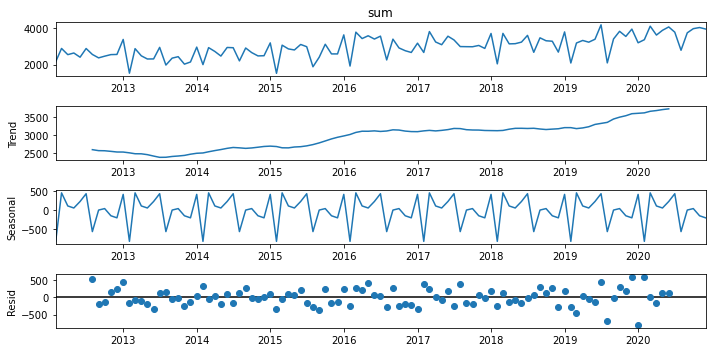

<Figure size 2880x720 with 0 Axes>

In [17]:
result = seasonal_decompose(df_model_商車['sum'],model='additive', period=12)
rcParams['figure.figsize'] = 10, 5
result.plot()
plt.figure(figsize=(40,10))
plt.show()

In [18]:
#build model
auto_arima(df_groupby_商車['sum'].diff()[1:],seasonal=True,m =13,stepwise = True,max_p = 3).summary() #12

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  107
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 13)   Log Likelihood                -809.514
Date:                             Sat, 14 May 2022   AIC                           1627.029
Time:                                     22:34:29   BIC                           1637.720
Sample:                                          0   HQIC                          1631.363
                                             - 107                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2640      0.142     -1.862      0.063      -0.542       0.014
ma.L1         -0.7858      0.070    -11.164      0.000      -0.924      -0.648
ar.S.L13      -0.2212      0.138     -1.607      0.108      -0.491       0.049
sigma2       2.14e+05   3.63e+04      5.891      0.000    1.43e+05    2.85e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 2.20
Prob(Q):                              0.74   Prob(JB):                         0.33
Heteroskedasticity (H):               2.24   Skew:                            -0.27
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
# 10210112
ans_ans = []
for x in range(70,len(df_model_商車.index)-1):  #4
    s = SARIMAX(
                df_model_商車.loc[:df_model_商車.index[x],'sum'].astype(int).values,
                order = (1,0,1),
                seasonal_order=(1,1,1,12),
                exog = df_model_商車.loc[:df_model_商車.index[x],[                                
                                    'CPI_sc_last_month',
                                    'last_sell',
                                    'stock_sc_last_month',
                                    'incomeaverage_sc_last_month']].astype(float),
                trend = 'ct',
                time_varying_regression=False,
                mle_regression=False,
                measurement_error = True,
                enforce_stationary = False
            )
    result = s.fit()
    ans = result.get_forecast(steps = 1, exog = df_model_商車.loc[df_model_商車.index[x+1],[
                                 'CPI_sc_last_month',
                                 'last_sell',
                                 'stock_sc_last_month',
                                 'incomeaverage_sc_last_month']].astype(float))
    ans_ans.append(ans.predicted_mean.values[0])

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.69020D+00    |proj g|=  4.41777D-02

At iterate    5    f=  5.65022D+00    |proj g|=  8.31011D-03

At iterate   10    f=  5.64909D+00    |proj g|=  1.77314D-03

At iterate   15    f=  5.64718D+00    |proj g|=  3.75075D-02

At iterate   20    f=  5.64637D+00    |proj g|=  1.62186D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     24     96      1     0     0   3.271D-01   5.646D+00
  F =   5.6463703910342842     

CONVERG

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f=  5.66449D+00    |proj g|=  4.36347D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     14     73      2     0     0   8.977D-02   5.664D+00
  F =   5.6644796277837832     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.77759D+00    |proj g|=  1.03696D-01

At iterate    5    f=  5.71785D+00    |proj g|=  1.25504D-02

At iterate   10    f=  5.70255D+00    |proj g|=  2.26644D-02
  ys=-3.568E-06  -gs= 5.343E-07 BFGS update SKIPPED

At iterate   15  


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     26    120      2     1     0   6.263D-02   5.697D+00
  F =   5.6968739625242426     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.81519D+00    |proj g|=  9.71767D-02

At iterate    5    f=  5.74184D+00    |proj g|=  1.63630D-02


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   10    f=  5.72564D+00    |proj g|=  2.16361D-02

At iterate   15    f=  5.71932D+00    |proj g|=  4.68897D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     19     80      2     0     0   3.500D-02   5.719D+00
  F =   5.7193116684793823     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.81812D+00    |proj g|=  1.01484D-01


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      2     19      1     0     0   3.856D-02   5.795D+00
  F =   5.7948514306082277     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.82848D+00    |proj g|=  1.07200D-01

At iterate    5    f=  5.77867D+00    |proj g|=  4.37916D-03


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   10    f=  5.76418D+00    |proj g|=  3.25350D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     12     40      1     0     0   4.196D-02   5.764D+00
  F =   5.7640106059115537     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.82065D+00    |proj g|=  3.50153D-02

At iterate    5    f=  5.78514D+00    |proj g|=  5.28230D-02

At iterate   10    f=  5.78074D+00    |proj g|=  4.99836D-03

At iterate   15    f=  5.78015D+00    |proj g|=  4.02808D-03

At iterate   20    f=  5.77990D+00    |proj g|=  4.80835D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     20     75      1     0     0   4.808D-02   5.780D+00
  F =   5.7798957982031336     

CONVERG


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   10    f=  5.79148D+00    |proj g|=  6.68511D-03

At iterate   15    f=  5.79132D+00    |proj g|=  3.89617D-03

At iterate   20    f=  5.79121D+00    |proj g|=  3.13999D-03

At iterate   25    f=  5.79096D+00    |proj g|=  2.82278D-02
  ys=-1.079E-11  -gs= 1.637E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     27     93      1     1     0   2.823D-02   5.791D+00
  F =   5.7909571606049548     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.85469D+00    |proj g|=  6.42410D-02

At iterate    5    f=  5.83197D+00    |proj g|=  1.12726D-02

At iterate   10    f=  5.80948D+00    |proj g|=  1.18451D-02

At iterate   15    f=  5.80761D+00    |proj g|=  1.94002D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f=  5.80757D+00    |proj g|=  2.41014D-02
  ys=-5.719E-08  -gs= 5.510E-07 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     24    104      2     1     0   4.900D-02   5.808D+00
  F =   5.8075675946859207     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.86544D+00    |proj g|=  5.29561D-02

At iterate    5    f=  5.84573D+00    |proj g|=  1.00270D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   10    f=  5.82243D+00    |proj g|=  2.29303D-02

At iterate   15    f=  5.82143D+00    |proj g|=  4.28975D-03

At iterate   20    f=  5.82048D+00    |proj g|=  5.42925D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     23     85      1     0     0   5.423D-02   5.820D+00
  F =   5.8204779146020256     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.87593D+00    |proj g|=  5.09199D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   10    f=  5.83111D+00    |proj g|=  8.14964D-02

At iterate   15    f=  5.83101D+00    |proj g|=  7.92003D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     16     55      1     0     0   7.920D-02   5.831D+00
  F =   5.8310091158265509     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.88750D+00    |proj g|=  6.22341D-02

At iterate    5    f=  5.86680D+00    |proj g|=  7.97283D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   10    f=  5.84726D+00    |proj g|=  3.90794D-02

At iterate   15    f=  5.84338D+00    |proj g|=  2.72498D-03

At iterate   20    f=  5.84177D+00    |proj g|=  3.55171D-03

At iterate   25    f=  5.84176D+00    |proj g|=  8.91891D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     26     68      1     0     0   8.919D-02   5.842D+00
  F =   5.8417576868200856     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  5.86911D+00    |proj g|=  4.00781D-02

At iterate   10    f=  5.86484D+00    |proj g|=  5.47126D-02

At iterate   15    f=  5.86377D+00    |proj g|=  1.19802D-02

At iterate   20    f=  5.86281D+00    |proj g|=  6.89359D-03

At iterate   25    f=  5.86239D+00    |proj g|=  2.87207D-02

At iterate   30    f=  5.86198D+00    |proj g|=  1.64845D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  5.86181D+00    |proj g|=  2.62852D-02

At iterate   40    f=  5.86172D+00    |proj g|=  8.00778D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     40    166      2     0     0   8.008D-02   5.862D+00
  F =   5.8617178403533252     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.90951D+00    |proj g|=  2.64073D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  5.90011D+00    |proj g|=  6.87117D-03

At iterate   10    f=  5.87382D+00    |proj g|=  2.15142D-02

At iterate   15    f=  5.87256D+00    |proj g|=  3.94307D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     60      1     0     0   3.943D-02   5.873D+00
  F =   5.8725605144004307     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.93309D+00    |proj g|=  3.02449D-02

At iter

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   10    f=  5.89993D+00    |proj g|=  3.64775D-02

At iterate   15    f=  5.88960D+00    |proj g|=  1.13186D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     18     85      1     0     0   1.777D-01   5.890D+00
  F =   5.8895907122162781     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.96435D+00    |proj g|=  1.86842D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  5.96405D+00    |proj g|=  1.66406D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      7     53      1     0     0   2.043D-01   5.964D+00
  F =   5.9640489876250253     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.97322D+00    |proj g|=  3.20390D-02

At iterate    5    f=  5.93969D+00    |proj g|=  1.56004D-02

At iterate   10    f=  5.93783D+00    |proj g|=  5.25184D-03

At iterate   15    f=  5.93751D+00    |proj g|=  3.29738D-03
  ys=-3.865E-04  -gs= 2.248E-05 BFGS update SKIPPED

At iterate   20    f=  5.93750D+00    |proj g|=  2.91781D-03

At iterate   25    f=  5.93744D+00    |proj g|=  2.85233D-02
  ys=-2.387E-03  -gs= 1.323E-04 BFGS update SKIPPED

At iterate   30    f=  5.92904D+00    |proj g|=  1.75682D-02

At iterate   35    f=  5.92171D+00    |proj g|=  2.99861D-02

At iterate   40    f=  5.91634D+00    |proj g|=  1.62173D-02

At iterate   45    f=  5.91245D+00    |proj g|=  7.18546D-03

At iterate   50    f=  5.91172D+00    |proj g|=  1.32640D-01

           * * *

Tit   = total number of iter

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   10    f=  5.94606D+00    |proj g|=  2.44357D-03

At iterate   15    f=  5.94595D+00    |proj g|=  4.25998D-02

At iterate   20    f=  5.94572D+00    |proj g|=  9.41998D-03

At iterate   25    f=  5.92823D+00    |proj g|=  4.17670D-02

At iterate   30    f=  5.92407D+00    |proj g|=  1.20929D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     31     73      1     0     0   1.260D-01   5.924D+00
  F =   5.9240679947926216     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.99712D+00    |proj g|=  2.50873D-02

At iterate    5    f=  5.95629D+00    |proj g|=  7.82954D-03

At iterate   10    f=  5.95608D+00    |proj g|=  2.29557D-02

At iterate   15    f=  5.95560D+00    |proj g|=  4.93226D-03

At iterate   20    f=  5.94428D+00    |proj g|=  3.52441D-02

At iterate   25    f=  5.93795D+00    |proj g|=  3.30527D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     29    134      2     0     0   6.089D-01   5.937D+00
  F =   5.9373736177927805     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.01648D+00    |proj g|=  2.68006D-02

At iterate    5    f=  5.97952D+00    |proj g|=  4.74690D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   10    f=  5.97886D+00    |proj g|=  6.42321D-04

At iterate   15    f=  5.97864D+00    |proj g|=  3.88704D-03

At iterate   20    f=  5.97476D+00    |proj g|=  1.33595D-02

At iterate   25    f=  5.96753D+00    |proj g|=  7.05194D-03

At iterate   30    f=  5.96175D+00    |proj g|=  1.57038D-01

At iterate   35    f=  5.96127D+00    |proj g|=  3.71796D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     35     67      1     0     0   3.718D-03   5.961D+00
  F =   5.9612655477183223     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  6.02684D+00    |proj g|=  1.73124D-02

At iterate   10    f=  6.02361D+00    |proj g|=  5.77685D-03

At iterate   15    f=  6.02292D+00    |proj g|=  4.78186D-03
  ys=-1.493E-05  -gs= 1.554E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f=  6.02269D+00    |proj g|=  5.29296D-02
  ys=-6.981E-09  -gs= 3.767E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     22    103      2     2     0   5.317D-02   6.023D+00
  F =   6.0226944750315505     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.08194D+00    |proj g|=  4.84030D-02

At iterate    5    f=  6.03549D+00    |proj g|=  1.16623D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   10    f=  6.03131D+00    |proj g|=  4.18420D-03
  ys=-5.781E-06  -gs= 2.371E-07 BFGS update SKIPPED

At iterate   15    f=  6.03120D+00    |proj g|=  4.89326D-02

At iterate   20    f=  6.03118D+00    |proj g|=  4.87633D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     20     72      1     1     0   4.876D-02   6.031D+00
  F =   6.0311817967123389     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   10    f=  6.05730D+00    |proj g|=  1.22696D-02

At iterate   15    f=  6.05725D+00    |proj g|=  1.00396D-01
  ys=-1.918E-06  -gs= 3.346E-08 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     17     71      1     1     0   1.035D-01   6.057D+00
  F =   6.0572541313383379     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.11133D+00    |proj g|=  4.58091D-02

At iterate    5    f=  6.07129D+00    |proj g|=  1.23589D-02

At iterate   10    f=  6.07012D+00    |proj g|=  8.68819D-03
  ys=-2.475E-05  -gs= 3.789E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f=  6.06947D+00    |proj g|=  7.53326D-02

At iterate   20    f=  6.06942D+00    |proj g|=  1.85111D-03

At iterate   25    f=  6.06941D+00    |proj g|=  2.05946D-03

At iterate   30    f=  6.06923D+00    |proj g|=  4.67937D-03

At iterate   35    f=  6.06910D+00    |proj g|=  4.38148D-04

At iterate   40    f=  6.06856D+00    |proj g|=  4.83995D-03

At iterate   45    f=  6.06090D+00    |proj g|=  1.04458D-01


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   50    f=  6.06056D+00    |proj g|=  1.41439D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50    162      2     1     0   1.414D-01   6.061D+00
  F =   6.0605613766211768     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.15403D+00    |proj g|=  2.80349D-02

At iterate    5    f=  6.11767D+00    |proj g|=  1.46999D-02

At iterate   10    f=  6.11572D+00    |proj g|=  3.92871D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.19358D+00    |proj g|=  2.76951D-02

At iterate    5    f=  6.18124D+00    |proj g|=  1.27959D-01

At iterate   10    f=  6.18113D+00    |proj g|=  4.91913D-03

At iterate   15    f=  6.18059D+00    |proj g|=  6.13555D-03

At iterate   20    f=  6.15965D+00    |proj g|=  9.81458D-03

At iterate   25    f=  6.15898D+00    |proj g|=  9.50996D-04

At iterate   30    f=  6.15870D+00    |proj g|=  2.95786D-03

At iterate   35    f=  6.15008D+00    |proj g|=  6.16199D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  6.14906D+00    |proj g|=  6.89117D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     44    140      2     0     0   4.041D-02   6.149D+00
  F =   6.1490473733825697     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.23261D+00    |proj g|=  4.20915D-02


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      2     10      1     0     0   2.395D-02   6.197D+00
  F =   6.1970596147567267     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.27311D+00    |proj g|=  1.27461D-01

At iterate    5    f=  6.21394D+00    |proj g|=  1.59306D-02

At iterate   10    f=  6.21296D+00    |proj g|=  6.56048D-03

At iterate   15    f=  6.21262D+00    |proj g|=  2.13540D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  6.22457D+00    |proj g|=  7.53666D-03

At iterate   10    f=  6.22388D+00    |proj g|=  1.06144D-02

At iterate   15    f=  6.22236D+00    |proj g|=  2.70911D-03

At iterate   20    f=  6.22232D+00    |proj g|=  2.87028D-03

At iterate   25    f=  6.21470D+00    |proj g|=  1.61571D-02

At iterate   30    f=  6.20423D+00    |proj g|=  3.05982D-03

At iterate   35    f=  6.20394D+00    |proj g|=  6.27008D-03

At iterate   40    f=  6.20314D+00    |proj g|=  1.20075D-03
  ys=-3.752E-08  -gs= 1.215E-07 BFGS update SKIPPED

At iterate   45    f=  6.20305D+00    |proj g|=  2.09733D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     46    108      1     1     0   2.097D-02   6.203D+00
  F =   6.2030525336347617     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.29594D+00    |proj g|=  1.46594D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f=  6.23746D+00    |proj g|=  1.91862D-02

At iterate   10    f=  6.23543D+00    |proj g|=  5.86621D-03

At iterate   15    f=  6.23428D+00    |proj g|=  9.55806D-03

At iterate   20    f=  6.23336D+00    |proj g|=  6.91242D-03

At iterate   25    f=  6.23256D+00    |proj g|=  1.83395D-02

At iterate   30    f=  6.21386D+00    |proj g|=  1.88120D-02

At iterate   35    f=  6.21339D+00    |proj g|=  5.46918D-03

At iterate   40    f=  6.21320D+00    |proj g|=  1.11499D-03

At iterate   45    f=  6.21319D+00    |proj g|=  1.83951D-02
  ys=-3.075E-06  -gs= 8.435E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   10    f=  6.24639D+00    |proj g|=  1.67511D-02

At iterate   15    f=  6.24486D+00    |proj g|=  1.31380D-02

At iterate   20    f=  6.24395D+00    |proj g|=  1.48704D-03

At iterate   25    f=  6.24389D+00    |proj g|=  5.17070D-03

At iterate   30    f=  6.23367D+00    |proj g|=  4.46130D-02

At iterate   35    f=  6.22359D+00    |proj g|=  8.16256D-03

At iterate   40    f=  6.22319D+00    |proj g|=  5.49355D-03

At iterate   45    f=  6.22309D+00    |proj g|=  2.25051D-03


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   50    f=  6.22306D+00    |proj g|=  3.82913D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     76      1     0     0   3.829D-04   6.223D+00
  F =   6.2230606485728179     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.38267D+00    |proj g|=  2.51909D-01

At iterate    5    f=  6.26182D+00    |proj g|=  1.91850D-02

At iterate   10    f=  6.25992D+00    |proj g|=  5.44976D-03

At iter

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  6.27422D+00    |proj g|=  2.13552D-02

At iterate   10    f=  6.27257D+00    |proj g|=  2.75981D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     13     37      1     0     0   1.359D-02   6.272D+00
  F =   6.2720563345666491     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.51849D+00    |proj g|=  4.51988D-01

At iterate    5    f=  6.27874D+00    |proj g|=  1.14223D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   10    f=  6.27798D+00    |proj g|=  1.70023D-03

At iterate   15    f=  6.27751D+00    |proj g|=  4.02160D-03
  ys=-6.590E-06  -gs= 7.955E-07 BFGS update SKIPPED

At iterate   20    f=  6.27744D+00    |proj g|=  3.71620D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     21     72      1     1     0   3.716D-02   6.277D+00
  F =   6.2774422281811919     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.57352D+00    |proj g|=  5.34583D-01

At iterate    5    f=  6.28428D+00    |proj g|=  2.80844D-02

At iterate   10    f=  6.28317D+00    |proj g|=  1.79981D-02

At iterate   15    f=  6.28294D+00    |proj g|=  6.07681D-03

At iterate   20    f=  6.28276D+00    |proj g|=  2.42514D-03

At iterate   25    f=  6.28236D+00    |proj g|=  6.57676D-03

At iterate   30    f=  6.26747D+00    |proj g|=  3.11110D-02

At iterate   35    f=  6.26555D+00    |proj g|=  8.85776D-03

At iterate   40    f=  6.26403D+00    |proj g|=  1.31029D-02

At iterate   45    f=  6.26299D+00    |proj g|=  3.84920D-03

At iterate   50    f=  6.26273D+00    |proj g|=  4.62484D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.55169D+00    |proj g|=  5.27388D-01

At iterate    5    f=  6.29315D+00    |proj g|=  1.84881D-02

At iterate   10    f=  6.29135D+00    |proj g|=  2.04645D-02
  ys=-8.765E-09  -gs= 4.614E-08 BFGS update SKIPPED

At iterate   15    f=  6.29130D+00    |proj g|=  2.97120D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f=  6.29121D+00    |proj g|=  3.25201D-03

At iterate   25    f=  6.29121D+00    |proj g|=  3.78144D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     28    141      3     1     0   1.741D-02   6.291D+00
  F =   6.2911992082937997     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [20]:
error_percent = np.mean(np.abs(df_model_商車.loc['2018-01-01 00:00:00':'2020-12-01 00:00:00','sum'] - ans_ans)/df_model_商車.loc['2018-01-01 00:00:00':'2020-12-01 00:00:00','sum'])

Text(0.5, 1.0, 'mape:0.114')

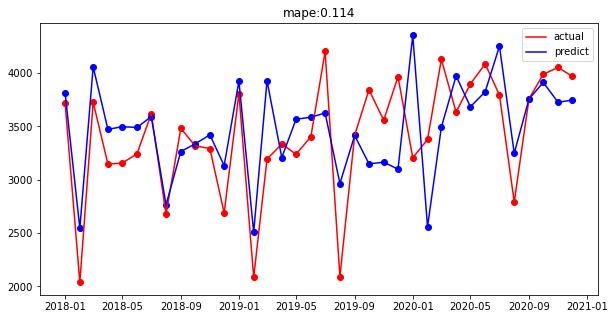

In [21]:
plt.plot(df_model_商車.loc['2018-01-01':'2020-12-01','sum'].index,df_model_商車.loc['2018-01-01':'2020-12-01','sum'],color = 'red')
plt.plot(df_model_商車.index[71:107],ans_ans,color = 'blue') #3
plt.scatter(df_model_商車.loc['2018-01-01':'2020-12-01','sum'].index,df_model_商車.loc['2018-01-01':'2020-12-01','sum'], color = 'red')
plt.scatter(df_model_商車.index[71:107],ans_ans,color = 'blue') #3
plt.legend(['actual','predict'])
plt.title('mape:'+str(error_percent.round(3)))

In [22]:
from sklearn.ensemble import RandomForestRegressor
X = df_model_商車.iloc[:,1:]
y = df_model_商車.iloc[:,0]
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X, y)
a = list(zip(X.columns,model.feature_importances_))
a.sort(key = lambda x:x[1])
a

[('covid_sc_last_month', 0.0010219943981419882),
 ('steel_sc_last_month', 0.007825191323161581),
 ('steel_sc', 0.008190314034507293),
 ('covid_sc', 0.009941206775195163),
 ('economicgrowth_sc', 0.013942881281145294),
 ('CPIT_sc', 0.01513075311930752),
 ('signal_sc', 0.01517120848193903),
 ('incomeaverage_sc_last_month', 0.01648981071384783),
 ('oil_sc_last_month', 0.01882770254079843),
 ('gdp_sc_last_month', 0.02018934318666707),
 ('CPI_sc', 0.020236750006729812),
 ('signal_sc_last_month', 0.020327572056138617),
 ('oil_sc', 0.024928240403911277),
 ('industry_sc_last_month', 0.02571727454808371),
 ('economicgrowth_sc_last_month', 0.027447590576294225),
 ('gdp_sc', 0.02873332754158681),
 ('CPIT_sc_last_month', 0.033118182948078584),
 ('lead_sc', 0.04041637677652652),
 ('stock_sc_last_month', 0.04139393962618908),
 ('lead_sc_last_month', 0.0415569446974592),
 ('last_sell', 0.04960736062937871),
 ('CPI_sc_last_month', 0.06752574345348203),
 ('stock_sc', 0.06936465485805723),
 ('incomeavera

In [80]:
# 10210112

# 將 seasonal q 調 8
ans_ans = []
for x in range(70,len(df_model_商車.index)-1):  #4
    if x < 85:
        s = SARIMAX(
                    df_model_商車.loc[:df_model_商車.index[x],'sum'].astype(int).values,
                    order = (1,1,3),
                    seasonal_order=(0,1,3,12),
                    exog = df_model_商車.loc[:df_model_商車.index[x],[                                
                                        'CPI_sc_last_month',
                                        'stock_sc',
                                        'incomeaverage_sc',
                                        'industry_sc',
                                        'last_sell']].astype(float),
                    trend = 'n',
                    time_varying_regression=True,
                    mle_regression=False,
                    measurement_error = True,
                    enforce_stationary = False
                )
    else:
        s = SARIMAX(
                    df_model_商車.loc[df_model_商車.index[x-60]:df_model_商車.index[x],'sum'].astype(int).values,
                    order = (1,1,8),
                    seasonal_order=(0,1,8,12),
                    exog = df_model_商車.loc[df_model_商車.index[x-60]:df_model_商車.index[x],[                                
                                        'CPI_sc_last_month',
                                        'stock_sc',
                                        'incomeaverage_sc',
                                        'industry_sc',
                                        'last_sell']].astype(float),
                    trend = 'n',
                    time_varying_regression=False,
                    mle_regression=False,
                    measurement_error = True,
                    enforce_stationary = False
                )
    result = s.fit()
    ans = result.get_forecast(steps = 1, exog = df_model_商車.loc[df_model_商車.index[x+1],[
                                 'CPI_sc_last_month',
                                 'stock_sc_last_month',
                                 'incomeaverage_sc',
                                 'industry_sc',
                                 'last_sell']].astype(float))
    ans_ans.append(ans.predicted_mean.values[0])

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.86959D+00    |proj g|=  7.10031D-01

At iterate    5    f=  5.49135D+00    |proj g|=  4.03259D-01

At iterate   10    f=  5.48311D+00    |proj g|=  1.49075D-01

At iterate   15    f=  5.47758D+00    |proj g|=  1.40144D-02

At iterate   20    f=  5.47734D+00    |proj g|=  2.92495D-03

At iterate   25    f=  5.47727D+00    |proj g|=  1.59840D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     28     87      1     0     0   1.599D-01   5.477D+00
  F =   5.4772686259411145     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.90110D+00    |proj g|=  7.13542D-01

At iterate    5    f=  5.51256D+00    |proj g|=  9.85650D-02

At iterate   10    f=  5.50138D+00    |proj g|=  7.59610D-02

At iterate   15    f=  5.50091D+00    |proj g|=  4.14357D-02

At iterate   20    f=  5.50051D+00    |proj g|=  4.46732D-03

At iterate   25    f=  5.50048D+00    |proj g|=  6.27079D-04

At iterate   30    f=  5.50046D+00    |proj g|=  1.27310D-03

At iterate   35    f=  5.50046D+00    |proj g|=  6.00215D-03

At iterate   40    f=  5.50031D+00    |proj g|=  2.77858D-02

At iterate   45    f=  5.49971D+00    |proj g|=  1.50256D-02


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.49765D+00    |proj g|=  3.59159D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     89      1     0     0   3.592D-02   5.498D+00
  F =   5.4976522877480631     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93329D+00    |proj g|=  7.18338D-01

At iterate    5    f=  5.54177D+00    |proj g|=  1.43840D-01

At iterate   10    f=  5.52620D+00    |proj g|=  1.30395D-01

At iterate   15    f=  5.52515D+00    |proj g|=  4.08659D-02

At iterate   20    f=  5.52411D+00    |proj g|=  5.48215D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  5.52410D+00    |proj g|=  7.75399D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     26     92      2     0     0   7.754D-02   5.524D+00
  F =   5.5241001427452545     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.96006D+00    |proj g|=  7.20219D-01

At iterate    5    f=  5.56833D+00    |proj g|=  1.71707D-01

At iterate   10    f=  5.56204D+00    |proj g|=  1.82930D-01

At iterate   15    f=  5.55621D+00    |proj g|=  2.34549D-02

At iterate   20    f=  5.55484D+00    |proj g|=  1.11704D-02

At iterate   25    f=  5.55363D+00    |proj g|=  2.50975D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  5.55363D+00    |proj g|=  1.45744D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     31    110      2     0     0   1.457D-01   5.554D+00
  F =   5.5536261664786286     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.99188D+00    |proj g|=  7.23558D-01

At iterate    5    f=  5.58288D+00    |proj g|=  2.29137D-01

At iterate   10    f=  5.57919D+00    |proj g|=  3.96607D-02

At iterate   15    f=  5.56928D+00    |proj g|=  3.11104D-02

At iterate   20    f=  5.56864D+00    |proj g|=  4.18683D-02

At iterate   25    f=  5.56823D+00    |proj g|=  1.05883D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  5.56811D+00    |proj g|=  3.46928D-03

At iterate   35    f=  5.56811D+00    |proj g|=  7.59942D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     36    120      2     0     0   7.599D-02   5.568D+00
  F =   5.5681062803920858     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.01895D+00    |proj g|=  7.27021D-01

At iterate    5    f=  5.59715D+00    |proj g|=  2.20213D-01

At iterate   10    f=  5.58956D+00    |proj g|=  1.22407D-01

At iterate   15    f=  5.58579D+00    |proj g|=  1.73014D-02

At iterate   20    f=  5.58459D+00    |proj g|=  3.44277D-02

At iterate   25    f=  5.58398D+00    |proj g|=  2.15772D-02

At iterate   30    f=  5.58386D+00    |proj g|=  1.38440D-02

At iterate   35    f=  5.58385D+00    |proj g|=  2.98024D-03

At iterate   40    f=  5.58385D+00    |proj g|=  1.22122D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.04521D+00    |proj g|=  7.30582D-01

At iterate    5    f=  5.61218D+00    |proj g|=  2.50249D-01

At iterate   10    f=  5.60594D+00    |proj g|=  3.03029D-02

At iterate   15    f=  5.59970D+00    |proj g|=  4.12450D-02

At iterate   20    f=  5.59867D+00    |proj g|=  1.68003D-02

At iterate   25    f=  5.59785D+00    |proj g|=  3.61071D-02

At iterate   30    f=  5.59748D+00    |proj g|=  1.97583D-02

At iterate   35    f=  5.59747D+00    |proj g|=  7.56095D-02

At iterate   40    f=  5.59747D+00    |proj g|=  7.21882D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.07101D+00    |proj g|=  7.34398D-01

At iterate    5    f=  5.63396D+00    |proj g|=  5.96436D-02

At iterate   10    f=  5.62520D+00    |proj g|=  1.68576D-01

At iterate   15    f=  5.61677D+00    |proj g|=  1.70157D-02

At iterate   20    f=  5.61565D+00    |proj g|=  1.34287D-02

At iterate   25    f=  5.61458D+00    |proj g|=  5.14330D-02

At iterate   30    f=  5.61450D+00    |proj g|=  1.15179D-02

At iterate   35    f=  5.61448D+00    |proj g|=  7.86346D-03

At iterate   40    f=  5.61443D+00    |proj g|=  1.51412D-01

At iterate   45    f=  5.61443D+00    |proj g|=  1.88684D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     48    112      1     0     0   7.661D-02   5.614D+00
  F =   5.6144247427673521     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.09781D+00    |proj g|=  7.37695D-01

At iterate    5    f=  5.64710D+00    |proj g|=  9.75796D-02

At iterate   10    f=  5.64126D+00    |proj g|=  1.84115D-01

At iterate   15    f=  5.63096D+00    |proj g|=  2.68176D-01

At iterate   20    f=  5.62910D+00    |proj g|=  1.14223D-01

At iterate   25    f=  5.62831D+00    |proj g|=  6.87748D-02

At iterate   30    f=  5.62770D+00    |proj g|=  8.79370D-03

At iterate   35    f=  5.62760D+00    |proj g|=  2.61660D-02

At iterate   40    f=  5.62759D+00    |proj g|=  6.48232D-03
  ys=-2.638E-07  -gs= 3.207E-08 BFGS update SKIPPED

At iterate   45    f=  5.62759D+00    |proj g|=  7.38069D-02


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.62759D+00    |proj g|=  7.52023D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50    128      1     1     0   7.520D-02   5.628D+00
  F =   5.6275854586546528     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.12060D+00    |proj g|=  7.40344D-01

At iterate    5    f=  5.66846D+00    |proj g|=  6.17976D-02

At iterate   10    f=  5.66285D+00    |proj g|=  1.28773D-01

At iterate   15    f=  5.65310D+00    |proj g|=  9.18450D-02

At iterate   20    f=  5.65181D+00    |proj g|=  2.83370D-02

At iterate   25    f=  5.65128D+00    |proj g|=  1.45681D-02

At iterate   30    f=  5.65128D+00    |proj g|=  7.22775D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.14794D+00    |proj g|=  7.43579D-01

At iterate    5    f=  5.68248D+00    |proj g|=  9.23076D-02

At iterate   10    f=  5.67868D+00    |proj g|=  1.81390D-01

At iterate   15    f=  5.67163D+00    |proj g|=  1.39254D-01

At iterate   20    f=  5.66731D+00    |proj g|=  3.90089D-02

At iterate   25    f=  5.66616D+00    |proj g|=  7.74416D-02

At iterate   30    f=  5.66576D+00    |proj g|=  1.45991D-02

At iterate   35    f=  5.66576D+00    |proj g|=  1.17381D-03
  ys=-3.461E-06  -gs= 2.816E-08 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     39    100      1     1     0   1.478D-01   5.666D+00
  F =   5.6657540848653234     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.17159D+00    |proj g|=  7.46672D-01

At iterate    5    f=  5.69708D+00    |proj g|=  5.07111D-02

At iterate   10    f=  5.69396D+00    |proj g|=  3.36609D-02

At iterate   15    f=  5.68635D+00    |proj g|=  8.88421D-02

At iterate   20    f=  5.68152D+00    |proj g|=  1.25336D-02

At iterate   25    f=  5.68145D+00    |proj g|=  1.09237D-02

At iterate   30    f=  5.68139D+00    |proj g|=  4.52383D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     34     73      1     0     0   7.295D-02   5.681D+00
  F =   5.6813835332109219     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19461D+00    |proj g|=  7.49554D-01

At iterate    5    f=  5.71277D+00    |proj g|=  6.17690D-02

At iterate   10    f=  5.70695D+00    |proj g|=  8.12385D-02

At iterate   15    f=  5.69776D+00    |proj g|=  2.01881D-01

At iterate   20    f=  5.69582D+00    |proj g|=  3.78077D-03

At iterate   25    f=  5.69580D+00    |proj g|=  3.16515D-03
  ys=-4.559E-06  -gs= 1.377E-07 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     29     78      1     1     0   7.399D-02   5.696D+00
  F =   5.6958039121354220     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.21596D+00    |proj g|=  7.52353D-01

At iterate    5    f=  5.72330D+00    |proj g|=  9.60757D-02

At iterate   10    f=  5.71877D+00    |proj g|=  1.26109D-01

At iterate   15    f=  5.71001D+00    |proj g|=  6.72796D-02

At iterate   20    f=  5.70768D+00    |proj g|=  1.41316D-02

At iterate   25    f=  5.70754D+00    |proj g|=  5.50222D-03

At iterate   30    f=  5.70751D+00    |proj g|=  3.76604D-03

At iterate   35    f=  5.70751D+00    |proj g|=  1.69382D-03

At iterate   40    f=  5.70748D+00    |proj g|=  2.24432D-02

At iterate   45    f=  5.70672D+00    |proj g|=  8.19616D-02

At iterate   50    f=  5.70122D+00    |proj g|=  3.59685D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.24033D+00    |proj g|=  7.55272D-01

At iterate    5    f=  5.73553D+00    |proj g|=  8.11633D-02

At iterate   10    f=  5.73042D+00    |proj g|=  8.98816D-02

At iterate   15    f=  5.72056D+00    |proj g|=  2.74986D-01

At iterate   20    f=  5.71850D+00    |proj g|=  9.57625D-03

At iterate   25    f=  5.71837D+00    |proj g|=  1.49723D-01

At iterate   30    f=  5.71837D+00    |proj g|=  1.48088D-03
  ys=-2.469E-08  -gs= 1.407E-07 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

   

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.46232D+00    |proj g|=  6.45200D-01

At iterate    5    f=  5.13680D+00    |proj g|=  4.44403D-02

At iterate   10    f=  5.13053D+00    |proj g|=  9.19103D-03

At iterate   15    f=  5.12586D+00    |proj g|=  5.31689D-02

At iterate   20    f=  5.12284D+00    |proj g|=  5.77627D-02

At iterate   25    f=  5.12101D+00    |proj g|=  1.53880D-02

At iterate   30    f=  5.11779D+00    |proj g|=  1.29077D-02

At iterate   35    f=  5.11345D+00    |proj g|=  8.49686D-03

At iterate   40    f=  5.11287D+00    |proj g|=  7.70500D-03

At iterate   45    f=  5.11234D+00    |proj g|=  6.74868D-03


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.11200D+00    |proj g|=  4.59267D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19     50     91      1     0     0   4.593D-03   5.112D+00
  F =   5.1119991617325997     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63343D+00    |proj g|=  1.11649D+00


 This problem is unconstrained.



At iterate    5    f=  5.18221D+00    |proj g|=  6.28954D-02

At iterate   10    f=  5.14761D+00    |proj g|=  2.14552D-02

At iterate   15    f=  5.14564D+00    |proj g|=  1.37499D-02

At iterate   20    f=  5.14097D+00    |proj g|=  2.42263D-02

At iterate   25    f=  5.13663D+00    |proj g|=  1.11073D-02

At iterate   30    f=  5.13096D+00    |proj g|=  1.85696D-02

At iterate   35    f=  5.12320D+00    |proj g|=  1.13132D-02

At iterate   40    f=  5.12311D+00    |proj g|=  3.22566D-03

At iterate   45    f=  5.12259D+00    |proj g|=  2.73760D-03
  ys=-1.159E-07  -gs= 1.565E-08 BFGS update SKIPPED

At iterate   50    f=  5.12259D+00    |proj g|=  3.39005D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.43413D+00    |proj g|=  6.42500D-01


 This problem is unconstrained.



At iterate    5    f=  5.11176D+00    |proj g|=  3.26766D-02

At iterate   10    f=  5.10788D+00    |proj g|=  1.94685D-02

At iterate   15    f=  5.10271D+00    |proj g|=  1.28633D-01

At iterate   20    f=  5.10150D+00    |proj g|=  8.48175D-03

At iterate   25    f=  5.10035D+00    |proj g|=  3.96535D-03

At iterate   30    f=  5.10004D+00    |proj g|=  2.21688D-01

At iterate   35    f=  5.09928D+00    |proj g|=  2.87476D-02

At iterate   40    f=  5.09470D+00    |proj g|=  1.98186D-02

At iterate   45    f=  5.09423D+00    |proj g|=  5.75827D-03


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.09395D+00    |proj g|=  6.19758D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19     50    105      1     0     0   6.198D-03   5.094D+00
  F =   5.0939521316189191     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48581D+00    |proj g|=  7.13777D-01


 This problem is unconstrained.



At iterate    5    f=  5.12409D+00    |proj g|=  1.54599D-01

At iterate   10    f=  5.11832D+00    |proj g|=  1.37834D-02

At iterate   15    f=  5.11183D+00    |proj g|=  1.05570D-02

At iterate   20    f=  5.11127D+00    |proj g|=  8.64049D-03

At iterate   25    f=  5.10998D+00    |proj g|=  1.52076D-01
  ys=-1.646E-05  -gs= 3.143E-07 BFGS update SKIPPED

At iterate   30    f=  5.10855D+00    |proj g|=  3.05323D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19     33    122      2     1     0   1.331D-01   5.107D+00
  F =   5.1073541864666527     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56086D+00    |proj g|=  6.59536D-01


 This problem is unconstrained.



At iterate    5    f=  5.16262D+00    |proj g|=  4.99148D-02

At iterate   10    f=  5.14048D+00    |proj g|=  1.25036D-02

At iterate   15    f=  5.13462D+00    |proj g|=  2.26772D-02
  ys=-1.960E-06  -gs= 9.618E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19     19     71      1     1     0   6.134D-01   5.135D+00
  F =   5.1345085729768813     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.52781D+00    |proj g|=  6.10414D-01

At iterate    5    f=  5.16145D+00    |proj g|=  1.25761D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19      6     25      1     0     0   1.258D-01   5.161D+00
  F =   5.1614466145031770     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.61521D+00    |proj g|=  6.53504D-01

At iterate    5    f=  5.13828D+00    |proj g|=  4.43269D-02

At iterate   10    f=  5.12813D+00    |proj g|=  1.40828D-01

At iterate   15    f=  5.12583D+00    |proj g|=  1.85493D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19     19     41      1     0     0   6.998D-02   5.125D+00
  F =   5.1247207401947339     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.54825D+00    |proj g|=  4.46419D-01


 This problem is unconstrained.



At iterate    5    f=  5.16543D+00    |proj g|=  5.99784D-02

At iterate   10    f=  5.13608D+00    |proj g|=  2.74856D-02

At iterate   15    f=  5.13162D+00    |proj g|=  1.77622D-02

At iterate   20    f=  5.12972D+00    |proj g|=  1.37674D-02

At iterate   25    f=  5.12728D+00    |proj g|=  3.58544D-03
  ys=-9.607E-08  -gs= 3.931E-08 BFGS update SKIPPED

At iterate   30    f=  5.12724D+00    |proj g|=  4.56233D-03
  ys=-7.234E-06  -gs= 1.173E-06 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19     34    116      1     2     0   2.020D-01   5.127D+00
  F =   5.1272413818214408     

CONVERGE


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.64199D+00    |proj g|=  5.24255D-01

At iterate    5    f=  5.16024D+00    |proj g|=  9.84086D-02

At iterate   10    f=  5.12461D+00    |proj g|=  1.98401D-02

At iterate   15    f=  5.12143D+00    |proj g|=  1.42423D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19     19     42      1     0     0   1.444D-01   5.119D+00
  F =   5.1185048376044504     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.61423D+00    |proj g|=  4.67479D-01

At iterate    5    f=  5.15320D+00    |proj g|=  9.50205D-02

At iterate   10    f=  5.12361D+00    |proj g|=  4.04798D-02

At iterate   15    f=  5.12081D+00    |proj g|=  7.66718D-03

At iterate   20    f=  5.11940D+00    |proj g|=  2.04825D-02

At iterate   25    f=  5.11812D+00    |proj g|=  7.16390D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   30    f=  5.11804D+00    |proj g|=  1.21918D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19     30     45      1     0     0   1.219D-02   5.118D+00
  F =   5.1180449548525209     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.57533D+00    |proj g|=  5.68757D-01


 This problem is unconstrained.



At iterate    5    f=  5.15369D+00    |proj g|=  6.20005D-02

At iterate   10    f=  5.12957D+00    |proj g|=  1.93645D-02
  ys=-6.186E-03  -gs= 2.885E-03 BFGS update SKIPPED

At iterate   15    f=  5.12578D+00    |proj g|=  1.85868D-02

At iterate   20    f=  5.12452D+00    |proj g|=  1.48347D-02

At iterate   25    f=  5.12070D+00    |proj g|=  1.52222D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19     28     63      1     1     0   9.887D-02   5.120D+00
  F =   5.1196492133756895     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.32262D+00    |proj g|=  2.96746D-01

At iterate    5    f=  5.14685D+00    |proj g|=  4.63014D-02

At iterate   10    f=  5.12037D+00    |proj g|=  2.68922D-02

At iterate   15    f=  5.11465D+00    |proj g|=  1.33394D-02

At iterate   20    f=  5.11251D+00    |proj g|=  1.58356D-02

At iterate   25    f=  5.11205D+00    |proj g|=  1.22188D-02

At iterate   30    f=  5.11171D+00    |proj g|=  1.87724D-02

At iterate   35    f=  5.11159D+00    |proj g|=  1.45325D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.47370D+00    |proj g|=  4.45559D-01

At iterate    5    f=  5.20068D+00    |proj g|=  7.01147D-02

At iterate   10    f=  5.17713D+00    |proj g|=  3.34778D-02

At iterate   15    f=  5.17512D+00    |proj g|=  2.39794D-02

At iterate   20    f=  5.17444D+00    |proj g|=  1.78531D-02

At iterate   25    f=  5.17418D+00    |proj g|=  2.63119D-02

At iterate   30    f=  5.17415D+00    |proj g|=  7.47099D-03

At iterate   35    f=  5.17392D+00    |proj g|=  3.30887D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19     36     89      1     0     0   3.309D-02   5.174D+00
  F =   5.1739230827589440     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40861D+00    |proj g|=  1.69159D-01


 This problem is unconstrained.



At iterate    5    f=  5.25233D+00    |proj g|=  3.84876D-02

At iterate   10    f=  5.24454D+00    |proj g|=  8.26057D-03

At iterate   15    f=  5.24318D+00    |proj g|=  1.24282D-02

At iterate   20    f=  5.24275D+00    |proj g|=  1.60550D-03

At iterate   25    f=  5.24263D+00    |proj g|=  1.04583D-03

At iterate   30    f=  5.24212D+00    |proj g|=  3.19691D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  5.24163D+00    |proj g|=  1.29628D-02
  ys=-1.887E-08  -gs= 3.400E-08 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19     39    146      2     1     0   1.827D-01   5.242D+00
  F =   5.2416078783327800     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40547D+00    |proj g|=  2.09685D-01


 This problem is unconstrained.



At iterate    5    f=  5.23596D+00    |proj g|=  7.75671D-02

At iterate   10    f=  5.21887D+00    |proj g|=  1.19890D-02

At iterate   15    f=  5.21795D+00    |proj g|=  4.86418D-03

At iterate   20    f=  5.21783D+00    |proj g|=  3.59589D-03

At iterate   25    f=  5.21776D+00    |proj g|=  3.23722D-03

At iterate   30    f=  5.21761D+00    |proj g|=  9.18820D-03

At iterate   35    f=  5.21760D+00    |proj g|=  3.77446D-03

At iterate   40    f=  5.21755D+00    |proj g|=  2.04186D-03

At iterate   45    f=  5.21749D+00    |proj g|=  7.04088D-03

At iterate   50    f=  5.21743D+00    |proj g|=  3.17880D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.28222D+00    |proj g|=  1.39526D-01


 This problem is unconstrained.



At iterate    5    f=  5.20249D+00    |proj g|=  3.69004D-02

At iterate   10    f=  5.19667D+00    |proj g|=  9.54365D-03

At iterate   15    f=  5.19612D+00    |proj g|=  1.28504D-03

At iterate   20    f=  5.19601D+00    |proj g|=  3.19522D-03

At iterate   25    f=  5.19557D+00    |proj g|=  2.69732D-03

At iterate   30    f=  5.19530D+00    |proj g|=  2.29943D-03

At iterate   35    f=  5.19484D+00    |proj g|=  6.66007D-03

At iterate   40    f=  5.19324D+00    |proj g|=  1.33083D-02

At iterate   45    f=  5.18857D+00    |proj g|=  2.16539D-02

At iterate   50    f=  5.15627D+00    |proj g|=  2.21518D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.29024D+00    |proj g|=  1.07418D-01


 This problem is unconstrained.



At iterate    5    f=  5.22348D+00    |proj g|=  4.42795D-02
  ys=-2.658E-03  -gs= 1.082E-02 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19      7     30      1     1     0   7.419D-02   5.222D+00
  F =   5.2217813468209409     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.33856D+00    |proj g|=  1.19068D-01


 This problem is unconstrained.



At iterate    5    f=  5.26672D+00    |proj g|=  2.10852D-02

At iterate   10    f=  5.25766D+00    |proj g|=  4.09955D-02

At iterate   15    f=  5.24709D+00    |proj g|=  1.41954D-02

At iterate   20    f=  5.24158D+00    |proj g|=  4.18967D-03

At iterate   25    f=  5.24153D+00    |proj g|=  3.04944D-03

At iterate   30    f=  5.24138D+00    |proj g|=  6.85955D-03

At iterate   35    f=  5.24099D+00    |proj g|=  7.58189D-03

At iterate   40    f=  5.24084D+00    |proj g|=  2.32358D-02
  ys=-2.000E-07  -gs= 4.058E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  5.24078D+00    |proj g|=  1.22881D-02

At iterate   50    f=  5.24078D+00    |proj g|=  4.82101D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19     50    157      2     1     0   4.821D-03   5.241D+00
  F =   5.2407750239181539     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.38455D+00    |proj g|=  3.05155D-01


 This problem is unconstrained.



At iterate    5    f=  5.21526D+00    |proj g|=  1.95061D-02

At iterate   10    f=  5.20901D+00    |proj g|=  2.23832D-01
  ys=-4.736E-07  -gs= 6.710E-08 BFGS update SKIPPED

At iterate   15    f=  5.20876D+00    |proj g|=  1.17822D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19     15     65      1     1     0   1.178D-01   5.209D+00
  F =   5.2087624243025168     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.37254D+00    |proj g|=  2.51600D-01

At iterate    5    f=  5.19531D+00    |proj g|=  2.14127D-02

At iterate   10    f=  5.19382D+00    |proj g|=  6.37055D-03

At iterate   15    f=  5.19367D+00    |proj g|=  3.04109D-03

At iterate   20    f=  5.19360D+00    |proj g|=  4.83648D-03

At iterate   25    f=  5.19338D+00    |proj g|=  8.38600D-03

At iterate   30    f=  5.19217D+00    |proj g|=  1.09128D-02

At iterate   35    f=  5.18862D+00    |proj g|=  4.46229D-02

At iterate   40    f=  5.18736D+00    |proj g|=  4.83133D-03

At iterate   45    f=  5.18699D+00    |proj g|=  6.20657D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19     49    104      1     0     0   4.352D-02   5.186D+00
  F =   5.1864609517803588     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.34779D+00    |proj g|=  2.69208D-01


 This problem is unconstrained.



At iterate    5    f=  5.15321D+00    |proj g|=  1.16826D-02

At iterate   10    f=  5.15292D+00    |proj g|=  8.52121D-03

At iterate   15    f=  5.15253D+00    |proj g|=  8.69069D-03

At iterate   20    f=  5.15178D+00    |proj g|=  1.98876D-02

At iterate   25    f=  5.14721D+00    |proj g|=  7.73362D-03

At iterate   30    f=  5.14640D+00    |proj g|=  7.00752D-03

At iterate   35    f=  5.14638D+00    |proj g|=  8.93169D-03

At iterate   40    f=  5.14564D+00    |proj g|=  2.92911D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19     41    112      1     0     0   2.929D-01   5.146D+00
  F =   5.14563697709


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [81]:
error_percent = np.mean(np.abs(df_model_商車.loc['2018-01-01 00:00:00':'2020-12-01 00:00:00','sum'] - ans_ans)/df_model_商車.loc['2018-01-01 00:00:00':'2020-12-01 00:00:00','sum'])

Text(0.5, 1.0, 'mape:0.0707')

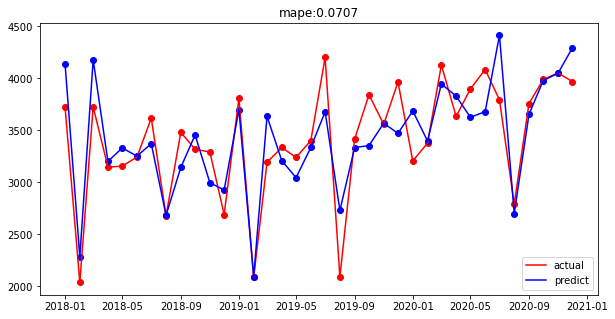

In [82]:
plt.plot(df_model_商車.loc['2018-01-01':'2020-12-01','sum'].index,df_model_商車.loc['2018-01-01':'2020-12-01','sum'],color = 'red')
plt.plot(df_model_商車.index[71:107],ans_ans,color = 'blue') #3
plt.scatter(df_model_商車.loc['2018-01-01':'2020-12-01','sum'].index,df_model_商車.loc['2018-01-01':'2020-12-01','sum'], color = 'red')
plt.scatter(df_model_商車.index[71:107],ans_ans,color = 'blue') #3
plt.legend(['actual','predict'])
plt.title('mape:'+str(error_percent.round(4)))

In [83]:
df_model_商車.index[91]

Timestamp('2019-09-01 00:00:00')

In [84]:
error_percent

0.07067415750083242